# [Lesson 04_01 Introduction to Julia functions](https://www.youtube.com/watch?v=mSkQV3JOZv8&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y&index=27)

One of the most useful aspects of Julia is the ability to create functions and more so, in the multiple dispatch format that functions take.  In this introduction we will take a look at what's coming up in this lesson.


## Introduction
- Single expression function
- Multiple expression functions
- optional arguments
- functions with a variable number of arguments
- passing arrays as function arguments
- Type parameters
- Stabby functions and do blocks
- Using functions as arguments
- Nested functions
- Multiple dispatch
- A few inbuilt functions (just for fun)
- List comprehension (just for some more fun)

# [Lesson 04_02 Single expression functions](https://www.youtube.com/watch?v=yOvqFO572-0&index=28&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y)

In [1]:
# creating our first single expression function
f(x, y) = x^2 -3y

f (generic function with 1 method)

The function has a name f and it takes two argumetns, x and y

In [2]:
f(2, 1)

1

In [3]:
g(x) = x^2

g (generic function with 1 method)

In [4]:
g(3)

9

# [Lesson 04_03 Multiple expression functions](https://www.youtube.com/watch?v=zirbpBaXPy0&index=29&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y)

In [11]:
function mltpl(x, y)
    println("The first value is $x and the second value is $y.")
    print("$x x $y is:")
    return x*y
end

mltpl (generic function with 1 method)

In [8]:
mltpl(3, 4)

The first value is 3 and the second value is 4.
3 x 4 is:

12

try if the format matters

In [10]:
function mltpl(x, y)
  println("The first value is $x and the second value is $y.")
      print("$x x $y is:"); return x*y
end

mltpl (generic function with 1 method)

## omit the return keyword

In [12]:
function mtpl2(x, y)
    print("More blah, blah, ...")
    x + y
    x * y
end

mtpl2 (generic function with 1 method)

In [13]:
mtpl2(3, 4)

More blah, blah, ...

12

The print() function was still evaluated, but as far as the expression go, only the last one was performed, i.e the x + y was skipped. 

## Return multiple values using a tuple

In [14]:
function math_func(a, b)
    print("This function will return addition, substraction and multiplication of the value $a and $b.")
    a + b, a - b, a * b
end

math_func (generic function with 1 method)

In [15]:
math_func(3, 4)

This function will return addition, substraction and multiplication of the value 3 and 4.

(7, -1, 12)

This can be very useful in Julia program. This is how we might use it:

In [16]:
ans1, ans2, ans3 = math_func(3, 4)

This function will return addition, substraction and multiplication of the value 3 and 4.

(7, -1, 12)

In [17]:
ans1

7

# [Lesson 04_04 Arguments with default values and keyword arguments](https://www.youtube.com/watch?v=u02muhfgTx4&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y&index=30)

We can set default values for arguments and even have keyword arguments.  The former means that values don't have tp be specified when calling the function and the latter allows us to chnage the order around when listing arguments when calling a function.  Just remember that keyword arguments have no be named when passed.

## Optional arguments (with default values)

A default value can be passed to an argument when defining a function

In [18]:
function func(a, b, c = 100)
    print("We have the value $a, $b, and $c")
end

func (generic function with 2 methods)

In [19]:
# Calling the function, but omitting the last argument
func(1, 10)

We have the value 1, 10, and 100

the last argument can be overwritten

In [20]:
func(1, 2, 3)

We have the value 1, 2, and 3

try if the named argument can be placed in front of the position argument  
=> **no**

In [21]:
func(c = 3, 1, 2)

LoadError: [91mfunction func does not accept keyword arguments[39m

## Using keyword arguments to bypass the order problem

we can create function with many, many argument. For arugment order, use semicolon ";"

More information: In Julia, [there are several types of argument](https://docs.julialang.org/en/stable/manual/functions/):
- Positional arguments (I am not 100% sure how it is called)
- Optional Arguments
- Keyword Arguments

In [22]:
# A most reidiculously long print statement.
function func2(a, b, c = 100 ; p = 100, q = "red")
    println("The first ordered argument value is $a.")
    println("The second ordered argument value is $b.")
    println("The third  ordered argument is optional. Default to 100. The current value is $c.")
    println("The keyword argument p value: $p.")
    println("The keyword argument q value: $q.")
    return a * b
end

func2 (generic function with 2 methods)

In [23]:
# calling just the first two ordered argument
func2(3, 4)

The first ordered argument value is 3.
The second ordered argument value is 4.
The third  ordered argument is optional. Default to 100. The current value is 100.
The keyword argument p value: 100.
The keyword argument q value: red.


12

In [24]:
# calling something else for c
func2(3, 4, 5)

The first ordered argument value is 3.
The second ordered argument value is 4.
The third  ordered argument is optional. Default to 100. The current value is 5.
The keyword argument p value: 100.
The keyword argument q value: red.


12

In [25]:
# Now lets have some fun with the keyword arguments
func2(3, 4, p = pi)

The first ordered argument value is 3.
The second ordered argument value is 4.
The third  ordered argument is optional. Default to 100. The current value is 100.
The keyword argument p value: π = 3.1415926535897....
The keyword argument q value: red.


12

In [26]:
# Now for q
func2(3, 4, 2, q = "Hello!")

The first ordered argument value is 3.
The second ordered argument value is 4.
The third  ordered argument is optional. Default to 100. The current value is 2.
The keyword argument p value: 100.
The keyword argument q value: Hello!.


12

In [27]:
# the order of p and q does not matter
func2(3, 4, 2, q = "Hello!", p = 10)

The first ordered argument value is 3.
The second ordered argument value is 4.
The third  ordered argument is optional. Default to 100. The current value is 2.
The keyword argument p value: 10.
The keyword argument q value: Hello!.


12

In [29]:
# This is very different to Python
# The keyword argument is in front of ordered argument
func2(p = 10, 3, 4, 2, q = "Hello!")

The first ordered argument value is 3.
The second ordered argument value is 4.
The third  ordered argument is optional. Default to 100. The current value is 2.
The keyword argument p value: 10.
The keyword argument q value: Hello!.


12

# [Lesson 04_05 Functions with a variable number of arguments](https://www.youtube.com/watch?v=kF5e4dE9k-s&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y&index=31)

In this section we take a look at creating functions that can take a different number of arguments each time it is called.

we can use three dots to indicate none, one, or many arguments.

In [30]:
function func3(args...)
    print("I can tell you how many arguments you passed: $(length(args))")
end

func3 (generic function with 1 method)

In [31]:
func3(1000000)

I can tell you how many arguments you passed: 1

In [32]:
func3("Julia")

I can tell you how many arguments you passed: 1

In [33]:
func3("Julia", "Hello")

I can tell you how many arguments you passed: 2

In [34]:
func3("Julia", "Hello", 1, 2, 3, "haha", true)

I can tell you how many arguments you passed: 7

In [39]:
function food(string_array)
    string_items = join(string_array, ", ", " and ")
    print("I like $string_items\!")
end

food (generic function with 1 method)

In [40]:
food(["Nutella", "honey"])

I like Nutella and honey!

In [41]:
# however
food("Nutella")

I like N, u, t, e, l, l and a!

to solve the problem above

In [42]:
function splat_food(strings...)
    string_items = join(strings, ", ", " and ")
    print("I like $string_items\!")
end

splat_food (generic function with 1 method)

In [44]:
splat_food("Nutella", "honey")

I like Nutella and honey!

In [45]:
splat_food("Nutella")

I like Nutella!

lets see how ... work.

In [47]:
function argues(a, b, s...)
    print("The argument values are: $a, $b, and $s")
end

argues (generic function with 1 method)

In [49]:
argues(3, 4)

The argument values are: 3, 4, and ()

In [50]:
argues(3, 4, 5)

The argument values are: 3, 4, and (5,)

In [51]:
argues(3, 4, 5, "julia")

The argument values are: 3, 4, and (5, "julia")

now lets try to combine keywords and splats

In [52]:
function fun_func(; a...)
    a
end

fun_func (generic function with 1 method)

In [53]:
# calling the fun_func() function, remembering to give the keywords names
fun_func(var1 = "Julia", var2 = "Language", val1 = 3)

3-element Array{Any,1}:
 (:var1, "Julia")   
 (:var2, "Language")
 (:val1, 3)         

This is a (key, value) tuples, with the key coming from the name we gave the keyword argument. Moreover, it is actually a **symbol** which you will note by the colon (:) preceding it. (We will discuss symbols in other lectures)

# [Lesson 04_06 Passing arrays as functions](https://www.youtube.com/watch?v=daEJ5kIscGs&index=32&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y)

We need not pass singles values or single strings as arguments.  In this section we take a look at ways of passing arrays as argument values.

Note: pass by value or pass by reference?

### A quick example of flow control inside of a function

In [54]:
function flow_func(args...)
    println("I can tell you how many arguments you passed: $(length(args)).")
    
    i = 1
    for n in args
        print("Argument ", i, " \t", n, "\n")
        i += 1
    end
end

flow_func (generic function with 1 method)

In [55]:
flow_func("Julia", "is", 1, "in", "a", 1000000, "!")

I can tell you how many arguments you passed: 7.
Argument 1 	Julia
Argument 2 	is
Argument 3 	1
Argument 4 	in
Argument 5 	a
Argument 6 	1000000
Argument 7 	!


my update of the function

In [56]:
function flow_func(args...)
    println("I can tell you how many arguments you passed: $(length(args)).")
    
    for (idx, n) in enumerate(args)
        print("Argument ", idx, " \t", n, "\n")
    end
end

flow_func (generic function with 1 method)

In [57]:
flow_func("Julia", "is", 1, "in", "a", 1000000, "!")

I can tell you how many arguments you passed: 7.
Argument 1 	Julia
Argument 2 	is
Argument 3 	1
Argument 4 	in
Argument 5 	a
Argument 6 	1000000
Argument 7 	!


### Passing arrays as funtion arguments

Once a function is defined, an array of values can be passed to it using the map function

In [58]:
# creating an array
xvals = [-3, -2.5, -2, -1.5, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]

12-element Array{Float64,1}:
 -3.0
 -2.5
 -2.0
 -1.5
 -0.5
  0.0
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0

In [59]:
# creating the function
function sqr(a)
    return a^2
end

sqr (generic function with 1 method)

In [60]:
# mapping the array to the function
map(sqr, xvals)

12-element Array{Float64,1}:
 9.0 
 6.25
 4.0 
 2.25
 0.25
 0.0 
 0.25
 1.0 
 2.25
 4.0 
 6.25
 9.0 

In [61]:
using Gadfly

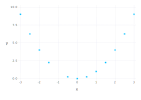

In [62]:
plot(x = xvals, y = map(sqr, xvals), Geom.point)

In [63]:
@time map(sin, collect(1:10000))

  0.035184 seconds (25.67 k allocations: 1.548 MiB)


10000-element Array{Float64,1}:
  0.841471
  0.909297
  0.14112 
 -0.756802
 -0.958924
 -0.279415
  0.656987
  0.989358
  0.412118
 -0.544021
 -0.99999 
 -0.536573
  0.420167
  ⋮       
 -0.953499
 -0.26156 
  0.670855
  0.98649 
  0.39515 
 -0.559489
 -0.999736
 -0.520831
  0.436924
  0.992973
  0.636087
 -0.305614

In [67]:
@time sin(collect(1:10000))

  0.016293 seconds (25.07 k allocations: 1.422 MiB)


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sin(::Array{Int64,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/clint/.julia/v0.6/IJulia/src/execute_request.jl:158
 [5] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/clint/.julia/v0.6/Compat/src/Compat.jl:385
 [6] eventloop(::ZMQ.Socket) at /home/clint/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[67], in expression starting on line 237


10000-element Array{Float64,1}:
  0.841471
  0.909297
  0.14112 
 -0.756802
 -0.958924
 -0.279415
  0.656987
  0.989358
  0.412118
 -0.544021
 -0.99999 
 -0.536573
  0.420167
  ⋮       
 -0.953499
 -0.26156 
  0.670855
  0.98649 
  0.39515 
 -0.559489
 -0.999736
 -0.520831
  0.436924
  0.992973
  0.636087
 -0.305614

In [70]:
array_1 = [3, 4]
tuple_1 = (3, 4)

(3, 4)

In [69]:
function h(x, y)
    return 3 * x + 2 * y
end

h (generic function with 1 method)

In [72]:
h(array_1...)

17

In [73]:
h(tuple_1...)

17

passing array -> passed by reference

In [75]:
array_primes = [1, 2, 3, 5, 7, 11, 13, 17, 19];

In [77]:
function add_ele(a)
    push!(a, 23)
end

add_ele (generic function with 1 method)

In [79]:
add_ele(array_primes)

10-element Array{Int64,1}:
  1
  2
  3
  5
  7
 11
 13
 17
 19
 23

In [80]:
array_primes

10-element Array{Int64,1}:
  1
  2
  3
  5
  7
 11
 13
 17
 19
 23

In [81]:
function func(x::Int)
    return 2 * x
end

func (generic function with 3 methods)

In [82]:
func(4)

8

In [83]:
func(4.0)

LoadError: [91mMethodError: no method matching func(::Float64)[0m
Closest candidates are:
  func(::Any, [91m::Any[39m) at In[18]:2
  func(::Any, [91m::Any[39m, [91m::Any[39m) at In[18]:2
  func([91m::Int64[39m) at In[81]:2[39m

In [84]:
methods(func)

# 3 methods for generic function "func":
func(x::Int64) in Main at In[81]:2
func(a, b) in Main at In[18]:2
func(a, b, c) in Main at In[18]:2

In [85]:
# x must be a subtype of Real
function func{T <: Real}(x::T)
    print("$x is of type $T")
end

func (generic function with 4 methods)

In [86]:
methods(func)

# 4 methods for generic function "func":
func(x::Int64) in Main at In[81]:2
func(x::T) where T<:Real in Main at In[85]:3
func(a, b) in Main at In[18]:2
func(a, b, c) in Main at In[18]:2

In [87]:
func(3.0)

3.0 is of type Float64

In [88]:
func(3)

6

interesting, the first declined one is executed. Note: ["The choice of which method to execute when a function is applied is called dispatch.](https://docs.julialang.org/en/stable/manual/methods/)

In [89]:
# be any type but must be the same type
function ident_type{T}(a::T, b::T)
    return +(a, b)
end

ident_type (generic function with 1 method)

In [92]:
ident_type(2, 2)

4

In [90]:
ident_type(2 + 4im, 1 + 0im)

3 + 4im

In [91]:
ident_type(2 + 4im, 1)

LoadError: [91mMethodError: no method matching ident_type(::Complex{Int64}, ::Int64)[0m
Closest candidates are:
  ident_type(::T, [91m::T[39m) where T at In[89]:3[39m

# [8. Stabby functions and do blocks](https://www.youtube.com/watch?v=ojkNZ3oapAA&index=34&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y)

Stabby lambda functions as they are called, are quick-and-dirty functions. It is also called lambda functions and is an example of an anonymous function, the latter referring to the fact that they don't have a name.

The do block is also a form of anonymous function.

In [93]:
# The Julia syntax uses the -> character combinations, hence stabby
x -> 2x^2 + 3x -2

(::#3) (generic function with 1 method)

**Combination with map**

In [94]:
map(x -> 2x^2 + 3x -2, [1, 2, 3, 4, 5])

5-element Array{Int64,1}:
  3
 12
 25
 42
 63

Review: single expression function in Julia

In [95]:
f(x) = 2x^2 + 3x -2

f (generic function with 2 methods)

In [97]:
map(f, [1, 2, 3, 4, 5])

5-element Array{Int64,1}:
  3
 12
 25
 42
 63

**The do block is also a form of anonymous function.**

In [98]:
map([1, 2, 3, 4, 5]) do x
    2x^2 + 3x -2
end

5-element Array{Int64,1}:
  3
 12
 25
 42
 63

search: else elseif ifelse @elapsed fieldoffset SerializationState

search: else elseif ifelse @elapsed fieldoffset SerializationState



The do block can do some more!

In [99]:
map([1, 2, 3, 4, 5]) do x
    # mod(x, 3) == 0
    if mod(x, 3) == 0
        100x
        
    # mod(x, 3) == 1    
    elseif mod(x, 3) == 1
        200x
        
    # mod(x, 3) == 2
    else
        300x
    end
end

5-element Array{Int64,1}:
  200
  600
  300
  800
 1500

 # [Lesson 04_09 Functions as arguments and nested functions](https://www.youtube.com/watch?v=qqOHHvozGT8&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y&index=35)

**Functions can be passed as functions** where they are simply used to be called.  **Functions can also be nested**, that is, they can be **defined inside of other functions** and called from within the original function.

## Using functions as arguments

In [100]:
# First function
function string_func(s)
    str = s()
    print("I love $str\!")
end

string_func (generic function with 1 method)

In [101]:
# Second function
function luv()
    return("Julia")
end

luv (generic function with 1 method)

In [102]:
string_func(luv)

I love Julia!

## Functions can be nested

a function inside of a function

In [103]:
function nest(x)
    x = 3x
    function inside_nest(x)
        return 3x
    end
    inside_nest(x)
end

nest (generic function with 1 method)

In [104]:
nest(5)

45

# [Lesson 04_10 Multiple dispatch](https://www.youtube.com/watch?v=pi4GM4ugPy4&list=PLsu0TcgLDUiIznEhN165XmykqyLgzwY0Y&index=36)

When functions are created, **a whole family actual exist**, each called up for use based on the type of the values that are passed as ordered arguments.

When we call a function we actually call a whole bunch of them. Julia decides which one to use based on the arguments (**there is a loop up table for every function, which is stored with the function**). Julia generates low-legel code based on your computer's instruction set.

So, when you create a function such as...
```
function cbd(a)
    return a^3
end
```
... a whole bunch of methods are created (the different implementations of a function are called methods) 

Multiple dispatch refers to calling the right implementation of a function based on the arguments. Note that only the position arguments are used to look up the correct method. When the function is used again but with different argument types, a new method is selected. This is called **overloading**

## Example: +() function

In [105]:
methods(+)

# 281 methods for generic function "+":
+(x::Bool, z::Complex{Bool}) in Base at complex.jl:232
+(x::Bool, y::Bool) in Base at bool.jl:89
+(x::Bool) in Base at bool.jl:86
+(x::Bool, y::T) where T<:AbstractFloat in Base at bool.jl:96
+(x::Bool, z::Complex) in Base at complex.jl:239
+(a::Float16, b::Float16) in Base at float.jl:372
+(x::Float32, y::Float32) in Base at float.jl:374
+(x::Float64, y::Float64) in Base at float.jl:375
+(z::Complex{Bool}, x::Bool) in Base at complex.jl:233
+(z::Complex{Bool}, x::Real) in Base at complex.jl:247
+(x::Char, y::Integer) in Base at char.jl:40
+(c::BigInt, x::BigFloat) in Base.MPFR at mpfr.jl:312
+(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) in Base.GMP at gmp.jl:334
+(a::BigInt, b::BigInt, c::BigInt, d::BigInt) in Base.GMP at gmp.jl:327
+(a::BigInt, b::BigInt, c::BigInt) in Base.GMP at gmp.jl:321
+(x::BigInt, y::BigInt) in Base.GMP at gmp.jl:289
+(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.GMP at gmp.jl:346
+(x::BigInt, c::Union{Int16, Int32, Int64, Int8}) in Base.GMP at gmp.jl:362
+(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) in Base.MPFR at mpfr.jl:460
+(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) in Base.MPFR at mpfr.jl:453
+(a::BigFloat, b::BigFloat, c::BigFloat) in Base.MPFR at mpfr.jl:447
+(x::BigFloat, c::BigInt) in Base.MPFR at mpfr.jl:308
+(x::BigFloat, y::BigFloat) in Base.MPFR at mpfr.jl:277
+(x::BigFloat, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.MPFR at mpfr.jl:284
+(x::BigFloat, c::Union{Int16, Int32, Int64, Int8}) in Base.MPFR at mpfr.jl:292
+(x::BigFloat, c::Union{Float16, Float32, Float64}) in Base.MPFR at mpfr.jl:300
+(B::BitArray{2}, J::UniformScaling) in Base.LinAlg at linalg/uniformscaling.jl:59
+(a::Base.Pkg.Resolve.VersionWeights.VWPreBuildItem, b::Base.Pkg.Resolve.VersionWeights.VWPreBuildItem) in Base.Pkg.Resolve.VersionWeights at pkg/resolve/versionweight.jl:87
+(a::Base.Pkg.Resolve.VersionWeights.VWPreBuild, b::Base.Pkg.Resolve.VersionWeights.VWPreBuild) in Base.Pkg.Resolve.VersionWeights at pkg/resolve/versionweight.jl:135
+(a::Base.Pkg.Resolve.VersionWeights.VersionWeight, b::Base.Pkg.Resolve.VersionWeights.VersionWeight) in Base.Pkg.Resolve.VersionWeights at pkg/resolve/versionweight.jl:197
+(a::Base.Pkg.Resolve.MaxSum.FieldValues.FieldValue, b::Base.Pkg.Resolve.MaxSum.FieldValues.FieldValue) in Base.Pkg.Resolve.MaxSum.FieldValues at pkg/resolve/fieldvalue.jl:44
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.CompoundPeriod) in Base.Dates at dates/periods.jl:349
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.Period) in Base.Dates at dates/periods.jl:347
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.TimeType) in Base.Dates at dates/periods.jl:387
+(a::Date, b::Base.Dates.Millisecond) in Compose at /home/clint/.julia/v0.6/Compose/src/misc.jl:187
+(x::Date, y::Base.Dates.Day) in Base.Dates at dates/arithmetic.jl:77
+(x::Date, y::Base.Dates.Week) in Base.Dates at dates/arithmetic.jl:75
+(dt::Date, z::Base.Dates.Month) in Base.Dates at dates/arithmetic.jl:58
+(dt::Date, y::Base.Dates.Year) in Base.Dates at dates/arithmetic.jl:32
+(dt::Date, t::Base.Dates.Time) in Base.Dates at dates/arithmetic.jl:20
+(t::Base.Dates.Time, dt::Date) in Base.Dates at dates/arithmetic.jl:24
+(x::Base.Dates.Time, y::Base.Dates.TimePeriod) in Base.Dates at dates/arithmetic.jl:81
+(dt::DateTime, z::Base.Dates.Month) in Base.Dates at dates/arithmetic.jl:52
+(dt::DateTime, y::Base.Dates.Year) in Base.Dates at dates/arithmetic.jl:28
+(x::DateTime, y::Base.Dates.Period) in Base.Dates at dates/arithmetic.jl:79
+(d::Missings.Missing) in Missings at /home/clint/.julia/v0.6/Missings/src/Missings.jl:92
+(::Missings.Missing, ::Missings.Missing) in Missings at /home/clint/.julia/v0.6/Missings/src/Missings.jl:107
+(d::Missings.Missing, x::Number) in Missings at /home/clint/.julia/v0.6/Missings/src/Missings.jl:108
+(d::DataArrays.NAtype) in DataArrays at /home/clint/.julia/v0.6/DataArrays/src/operators.jl:204
+(::DataArrays.NAtype, ::DataArra

In [106]:
+(2, 2 + 2im)

4 + 2im

In [107]:
+("2", "2 + 2im")

LoadError: [91mMethodError: no method matching +(::String, ::String)[0m
Closest candidates are:
  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:424[39m

When you call a function, such as +(), you can see which method is used

In [108]:
# Using the macro @which
@which +(true, true)

+(x::Bool, y::Bool) in Base at bool.jl:89

we can also find out which functions use a specific type

In [109]:
methodswith(Integer)

  likely near In[109]:1
  likely near In[109]:1


1127-element Array{Method,1}:
 A_ldiv_B_md(F, src, dim::Integer) in AxisAlgorithms at /home/clint/.julia/v0.6/AxisAlgorithms/src/AxisAlgorithms.jl:19                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 A_ldiv_B_md!(dest, F, src, dim::Integer) in AxisAlgorithms at /home/clint/.julia/v0.6/AxisAlgorithms/src/tridiag.jl:10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 A_ldiv_B_md!(dest, F, src, dim::Integer, b::AbstractArray{T,1} where T) in Interpolations at /home/clint/.julia/v0.6/Interpolations/src/b-splines/../filter1d.jl:7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
 A_mul_B_md(M::AbstractArray{T,2} where T, src, dim::Integer) in AxisAlgorithms at /home/clint/.julia/v0.6/AxisAlgorithms/src/AxisAlgorithms.jl:26                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 A_mul_B_md!(dest, M::AbstractArray{T,2} where T, src, dim::Integer) in AxisAlgorithms at /home/clint/.julia/v0.6/AxisAlgorithms/src/matmul.jl:32                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [110]:
function my_func(a, b) # When no type is specified, ANY is implied
    return print("Generic case")
end

function my_func(a::Real, b::Real) 
    return print("Both arguments are numbers")
end

function my_func(a::Real, b)
    return print("The first argument is a number")
end

function my_func(a, b::Real)
    return print("The second argument is a number")
end

my_func (generic function with 4 methods)

In [114]:
my_func(1+1im, 3+1im)

Generic case

In [115]:
my_func("1", "3")

Generic case

In [111]:
my_func(1, 3)

Both arguments are numbers

In [112]:
my_func(1, "3")

The first argument is a number

In [113]:
my_func("1", 3)

The second argument is a number

## A selection of inbuilt Julia functions

Operations  
`+(3, 1)`

In [116]:
typeof(+)

Base.#+

### The filter() function

In [117]:
filter(i -> iseven(i), collect(1:20))

10-element Array{Int64,1}:
  2
  4
  6
  8
 10
 12
 14
 16
 18
 20

### The find() and isprime() function

In [125]:
using Primes

In [126]:
function prime_numbers{T<:Integer}(a::Array{T, 1})
    find(isprime, a)
end

prime_numbers (generic function with 1 method)

In [127]:
prime_numbers(collect(1:20))

8-element Array{Int64,1}:
  2
  3
  5
  7
 11
 13
 17
 19

In [128]:
# we could simplify the function above
function easy_primes(a::Array{Int64, 1})
    find(isprime, a)
end

easy_primes (generic function with 1 method)

In [129]:
easy_primes(collect(1:20))

8-element Array{Int64,1}:
  2
  3
  5
  7
 11
 13
 17
 19

## List comprehension

In [130]:
matrix1 = [x + y for x in 1:2, y in 1:3]

2×3 Array{Int64,2}:
 2  3  4
 3  4  5

In [132]:
[x + y for x = 1:2, y = 1:3]

2×3 Array{Int64,2}:
 2  3  4
 3  4  5

In [134]:
[x + y for x = 1:2 for y = 1:3]

6-element Array{Int64,1}:
 2
 3
 4
 3
 4
 5